# Лабораторная работа №1
## Персептроны. Процедура обучения Розенблатта
### Варант 8

Целью работы является исследование свойств персептрона Розенблатта и его при-
менение для решения задачи распознавания образов.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Создам и скомпилирую нейросетевую модель. Модель состоит из одного слоя с двумя входами и одним выходом.

In [2]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim=2, activation='sigmoid',
                                 kernel_initializer=keras.initializers.RandomNormal(stddev=0.5,mean=0.0),
                                 bias_initializer=keras.initializers.Zeros()))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Обучу модель.

In [3]:
X = tf.constant([[-2.8, 1.4], [-0.2, -3.5], [2.8, -4], [-2.1, -2.7], [0.3, -4.1], [-1, -4]])
y = tf.constant([0, 1, 1, 0, 1, 0])

epochs = 500
hist = model.fit(X, y, batch_size=1, epochs=epochs)

Epoch 1/500
6/6 [==============================] - 1s 5ms/step - loss: 0.2194 - mae: 0.3751
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.2170 - mae: 0.3732
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2144 - mae: 0.3707
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2122 - mae: 0.3689
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2101 - mae: 0.3671
Epoch 6/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2078 - mae: 0.3652
Epoch 7/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2053 - mae: 0.3625
Epoch 8/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2022 - mae: 0.3601
Epoch 9/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2004 - mae: 0.3581
Epoch 10/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1984 - mae: 0.3565
Epoch 11/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1960 

Использую веса модели для построения дискриминантной прямой.

In [4]:
w1 = model.get_weights()[0][0][0]
w2 = model.get_weights()[0][1][0]
b = model.get_weights()[1][0]

plot_x = np.linspace(-3, 3, 2)
plot_y = ((-plot_x*w1)/w2)-(b/w2)

Построю данные на графике

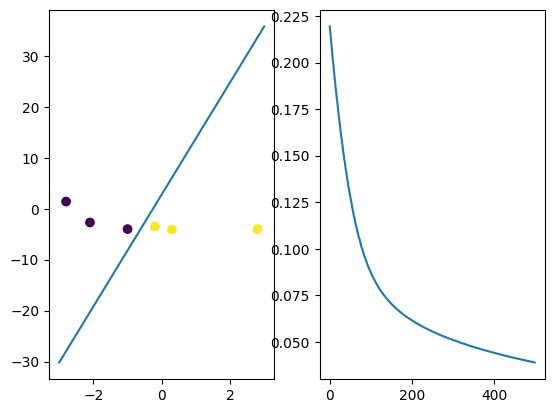

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(plot_x, plot_y)
ax[0].scatter(X[:,0], X[:,1], c=y)

ax[1].plot(hist.history['loss'])

plt.show()

# Часть 2

Построю и обучу перцептрон для классификации на 4 класса. 

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_dim=2, activation='sigmoid',
                                 kernel_initializer=keras.initializers.RandomNormal(stddev=0.5,mean=0.0),
                                 bias_initializer=keras.initializers.Zeros()))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [7]:
X = tf.constant([[1.7, 3.3], [4.7, -4.5], [-0.5, 0.8], [1.8, 2.1], [1.5, 2.2], [-1.3, 0.8], [-3.9, -4.5], [4.7, -2.2]])
y = tf.constant([[1, 1], [0, 1], [1, 0], [1, 1], [1, 1], [1, 0], [0, 0], [0, 1]])

epochs = 500
hist = model.fit(X, y, batch_size=1, epochs=epochs)

Epoch 1/500
8/8 [==============================] - 0s 5ms/step - loss: 0.2814 - mae: 0.5147
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 0.2771 - mae: 0.5104
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 0.2724 - mae: 0.5060
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 0.2680 - mae: 0.5017
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 0.2637 - mae: 0.4975
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 0.2595 - mae: 0.4933
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 0.2553 - mae: 0.4891
Epoch 8/500
8/8 [==============================] - 0s 4ms/step - loss: 0.2512 - mae: 0.4849
Epoch 9/500
8/8 [==============================] - 0s 5ms/step - loss: 0.2473 - mae: 0.4810
Epoch 10/500
8/8 [==============================] - 0s 5ms/step - loss: 0.2434 - mae: 0.4769
Epoch 11/500
8/8 [==============================] - 0s 4ms/step - loss: 0.2389 

In [8]:
w11 = model.get_weights()[0][0][0]
w12 = model.get_weights()[0][0][1]
b1 = model.get_weights()[1][0]

w21 = model.get_weights()[0][1][0]
w22 = model.get_weights()[0][1][1]
b2 = model.get_weights()[1][1]

plot_x1 = np.linspace(-5, 5, 2)
plot_y1 = ((-plot_x1*w11)/w12)-(b1/w12)
plot_x2 = np.linspace(-5, 5, 2)
plot_y2 = ((-plot_x2*w21)/w22)-(b2/w22)

Построю график двух дискриминантных прямых.

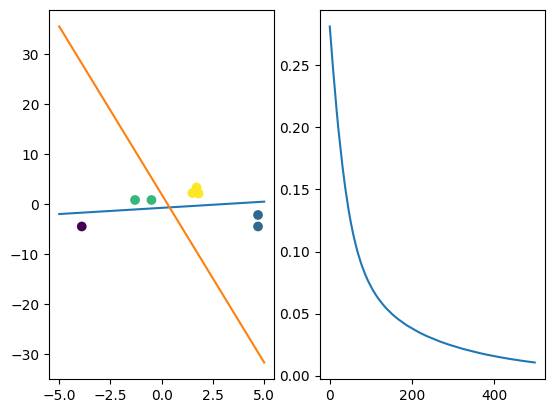

In [9]:
colors = 2*y[:, 0]+y[:, 1]

fig, ax = plt.subplots(1, 2)
ax[0].plot(plot_x1, plot_y1)
ax[0].plot(plot_x2, plot_y2)
ax[0].scatter(X[:,0], X[:,1], c=colors)

ax[1].plot(hist.history['loss'])

plt.show()

__Выоды__: в ходе выполнения лабораторой работы, я изучил базовые принципы построения нейросетевых моделей, построил и обучил простейший прецептрон Розенблата для классификации на 2 и на 4 класса. Также повторил оновы работы с нейросетевым фреймворком Tensorflow.